# Ejercicio 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import cos
from math import sin
from math import pi

In [2]:
SQUARE_SIDE = 10
CENTER = (20, 20)
N=10000
ROTATION_ANGLE = -(pi / 4)

In [3]:
# Contraint points within the four linear functions that define the shape.
# Y1 >= -X + 32.928
# Y2 <= -X + 47.071
# Y3 >= X - 7.071
# Y4 <= X + 7.071
def constrained_points(x, y):
    X = []
    Y = []

    for i in range(N):
        if (y[i] >= -x[i] + 32.928) and (y[i] <= -x[i] + 47.071) and (y[i] >= x[i] - 7.071) and (y[i] <= x[i] + 7.071):
            X.append(x[i])
            Y.append(y[i])

    return X, Y

In [4]:
def rotate_points(x, y):
    X = []
    Y = []

    for i in range(N):
        X.append((x[i] - CENTER[0]) * cos(ROTATION_ANGLE) - (y[i] - CENTER[1]) * sin(ROTATION_ANGLE) + CENTER[0])
        Y.append((x[i] - CENTER[0]) * sin(ROTATION_ANGLE) + (y[i] - CENTER[1]) * cos(ROTATION_ANGLE) + CENTER[1])
    
    return X, Y

In [5]:
# Renders a batch of points using the provided random function.
def render(f):
    min_x = CENTER[0] - SQUARE_SIDE / 2
    max_x = CENTER[0] + SQUARE_SIDE / 2

    min_y = CENTER[1] - SQUARE_SIDE / 2
    max_y = CENTER[1] + SQUARE_SIDE / 2

    x=f(low=min_x, high=max_x, size=N)
    y=f(low=min_y, high=max_y, size=N)

    X, Y = rotate_points(x, y)

    plt.xlim(0, 40)
    plt.ylim(0, 40)
    plt.scatter(X, Y, s=1)
    plt.figtext(.25, .82, "Factor de Rendimiento: {}/{} = {}".format(len(constrained_points(X, Y)[0]), N,
                                                                     len(constrained_points(X, Y)[0]) / N))
    plt.show()

## Metodo 1 (Numpy Uniform Distribution)

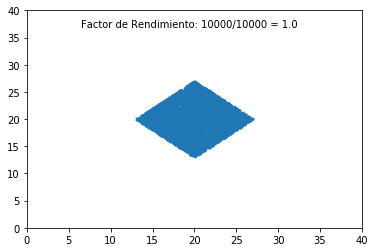

In [6]:
render(np.random.uniform)

## Metodo 2 (GCL Ejercicio 1)

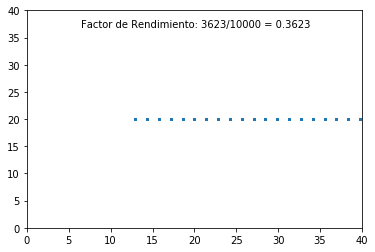

In [7]:
mod = 2**32 
multiplier = 1013904223
increment = 1664525
seed = int((97771 + 95637 + 99288 + 95605) / 4)

numsGen = {}
numsGen[0] = seed

def GCL(n):
    if (n in numsGen) :
        return numsGen[n]
    else:
        numsGen[n] = (multiplier*GCL(n-1) + increment) % mod
        return numsGen[n]

def GCL_wrapper(low, high, size):
    X = []
    
    for i in range(size):
        X.append(low + GCL(i) % high)
    
    return X

render(GCL_wrapper)

## Conclusion

Para comparar ambos métodos utilizamos los gráficos generados mediante Matplotlib y los factores de rendimientos obtenidos en base a las muestras generadas.  
Por un lado, con solo ver el gráfico del modelo 1 es sensato decir que este sigue la distribución pedida y, esto queda aún más claro, cuando tenemos en cuanto el factor de rendimiento calculado para el mismo.  
Por otro lado, analizando el gráfico del modelo 2 no sigue los lineamientos pedidos por la distribución propuesta y, además, el factor de rendimiento es sustancialmente más bajo que el modelo 1.  
En conclusión, el modelo 1 sigue la distribución propuesta pero no así el modelo 2.